# PySR Dry Run


In [10]:
# Install libraries
!pip install -U pysr

In [11]:
import pysr

In [12]:
# Call libraries
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import time

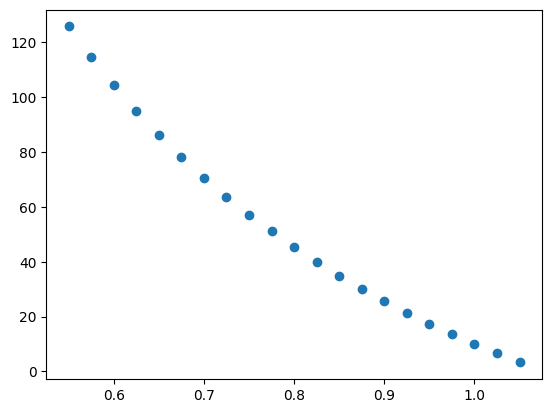

In [13]:
# Build Toy Dataset
x=np.arange(start=0.55,stop=1.075,step=0.025)
y=141.5/x-131.5
plt.plot(x,y,marker="o",linestyle="None")
plt.show()

In [14]:
t0 = time.time()
myMod=PySRRegressor(random_state=7)
myMod.fit(x.reshape(-1, 1),y)
y_pred=myMod.predict(x.reshape(-1, 1))
print("time to fit: ",time.time() - t0, 'seconds')

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pysr/sr.py:1873: UserWarning: Note: Setting `random_state` without also setting `deterministic=True` and `parallelism='serial'` will result in non-deterministic searches.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.530e+04
Progress: 219 / 3100 total iterations (7.065%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.321e+03  0.000e+00  y = 52.149
3           6.519e+02  3.532e-01  y = 44 / x₀
5           4.859e-11  1.511e+01  y = (141.5 / x₀) - 131.5
7           4.755e-11  1.081e-02  y = ((141.5 / x₀) - 122.91) + -8.593
9           2.399e-11  3.420e-01  y = ((76.69 / x₀) + -131.5) + (64.81 / x₀)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 4.500e+04
Progress: 459 / 3100 total iterations (14.806%)
════════════════════

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.090e+05
Progress: 2977 / 3100 total iterations (96.032%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.321e+03  0.000e+00  y = 52.149
3           6.519e+02  3.532e-01  y = 44 / x₀
5           4.859e-11  1.511e+01  y = (141.5 / x₀) - 131.5
7           1.586e-11  5.597e-01  y = (-131.5 - (-141.5 / x₀)) * 1
9           5.760e-12  5.066e-01  y = 1 + (((x₀ * -132.5) - -141.5) / x₀)
15          3.129e-12  1.017e-01  y = (x₀ + 1.0132) + ((((x₀ * -132.5) - -141.5) / x₀) - (x₀...
                                       + 0.013197))
17          2.991e-12  2.256e-02  y = (x₀ / x₀) + (((-1.7751e-08 / (0.65761 - x₀)) + ((x₀ * ...
                                      -132.5) - -141.5)) / x₀)
21          2.988e-12  2.263e-04  y = ((x₀ / x₀) + ((x₀ - (0.171

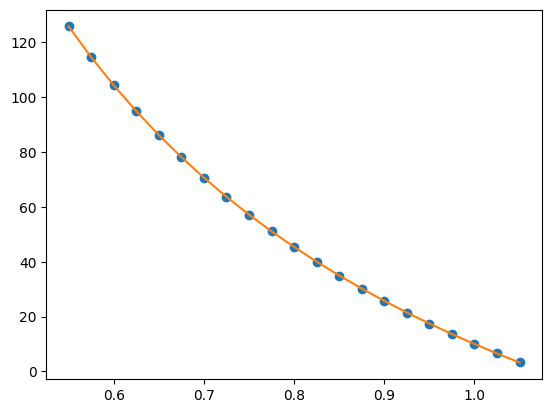

In [15]:
plt.plot(x,y,marker="o",linestyle="None")
plt.plot(x,y_pred)
plt.show()

In [16]:
myEq=myMod.sympy()
myEq

x0 - (x0 + 0.013196754) + 1.0131962 + (x0*(-132.5) - 1*(-141.5))/x0

In [17]:
sym.simplify(myEq)

-131.500000554 + 141.5/x0

In [18]:
x, y = sym.symbols('x y')
myTarg=sym.sympify(141.5/x-131.5)
myTarg

-131.5 + 141.5/x